In [1]:
import pandas as pd
import numpy as np
import pickle
import os
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
folder_path = "./Monografia/Exp1-2/test_stats/"

In [3]:
def metricas_2(df):
    # To calculate the cumulative regret at each step of each episode. And in a different way that in the train-test code. Also, to calculate the suboptimal pulls

    cumulative_regret_list_column = []
    cumulative_regret_episode = []
    suboptimal_pulls_episode = []

    for i, episode in df.iterrows():

        cumulative_regret_list = []
        cumulative_regret = 0
        suboptimal_pulls = 0

        optimal_action = episode['Optimal Action']
        bandits_probs = episode['Bandits_Probs']

        for action in episode['Actions-Chosen List']:
            regret = bandits_probs[optimal_action] - bandits_probs[action]
            cumulative_regret += regret
            cumulative_regret_list.append(cumulative_regret)

            is_suboptimal_pull = int(optimal_action != action)
            suboptimal_pulls += is_suboptimal_pull


        cumulative_regret_list_column.append(cumulative_regret_list) # list of c.r at each step of episode
        cumulative_regret_episode.append(cumulative_regret) # list of c.r at the end of episode
        suboptimal_pulls_episode.append(suboptimal_pulls) # list of c.r at the end of episode
        
    df['Cumulative Regret List'] = cumulative_regret_list_column  
    df['Cumulative Regret v2'] = cumulative_regret_episode
    df['Suboptimal Pulls v2'] = suboptimal_pulls_episode

    return df


## **General Results**

In [4]:
# List all .pkl file in folder_path:
folder_path = "./Monografia/Exp1-2/test_stats/"
files_path = [file for file in os.listdir(folder_path) if file.endswith(".pkl")]

results = []

for file_path in files_path:

    # Read file
    tmp = pd.read_pickle(folder_path + '/' + file_path)

    # Add cumulative regret v2
    tmp = metricas_2(tmp)

    # Compute Scores
    val_score = tmp[0:150]['Cumulative Regret'].mean()
    val_score_2 = tmp[0:150]['Cumulative Regret v2'].mean()
    test_score = tmp[150:]['Cumulative Regret'].mean()
    test_score_2 = tmp[150:]['Cumulative Regret v2'].mean()
    train_difficulty = tmp.iloc[0]['train_difficulty']
    test_difficulty = tmp.iloc[0]['test_difficulty']

    # Add to Results
    results.append({'file': file_path, 'train_difficulty':train_difficulty, 'test_difficulty':test_difficulty, 
    'val_score':val_score, 'test_score':test_score, 'val_score_2':val_score_2, 'test_score_2':test_score_2})

results_df = pd.DataFrame(results)


,file,train_difficulty,test_difficulty,val_score,test_score,val_score_2,test_score_2
20,TrainDiff_easy__LR_0_0001__GAMMA_0_9__EntropyD...,easy,easy,0.146667,0.800000,0.602667,0.682667
6,TrainDiff_easy__LR_0_0001__GAMMA_0_7__EntropyD...,easy,hard,0.893333,0.380000,0.629333,0.704000
7,TrainDiff_easy__LR_0_0001__GAMMA_0_7__EntropyD...,easy,independent,0.633333,0.460000,0.544000,0.597333
38,TrainDiff_easy__LR_0_001__GAMMA_0_7__EntropyDe...,easy,medium,0.680000,0.393333,0.560000,0.624000
39,TrainDiff_easy__LR_0_001__GAMMA_0_7__EntropyDe...,easy,uniform,0.006667,1.200000,0.581333,1.274667
60,TrainDiff_independent__LR_0_0001__GAMMA_0_7__E...,independent,easy,4.986780,5.018294,4.801853,5.332878
61,TrainDiff_independent__LR_0_0001__GAMMA_0_7__E...,independent,hard,4.572595,4.370389,4.881804,4.350424
67,TrainDiff_independent__LR_0_0001__GAMMA_0_7__E...,independent,independent,4.807551,5.342236,4.393861,5.662954
68,TrainDiff_independent__LR_0_0001__GAMMA_0_7__E...,independent,medium,4.383842,5.915112,4.574155,5.893358
64,TrainDiff_independent__LR_0_0001__GAMMA_0_7__E...,independent,uniform,5.897707,5.516410,5.281710,5.263319


C:\Users\Emilio\AppData\Local\Temp\ipykernel_9244\3216319112.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_results = results_df.groupby(['train_difficulty', 'test_difficulty'], group_keys=False).apply(lambda x: x.nsmallest(N, 'val_score_2'))


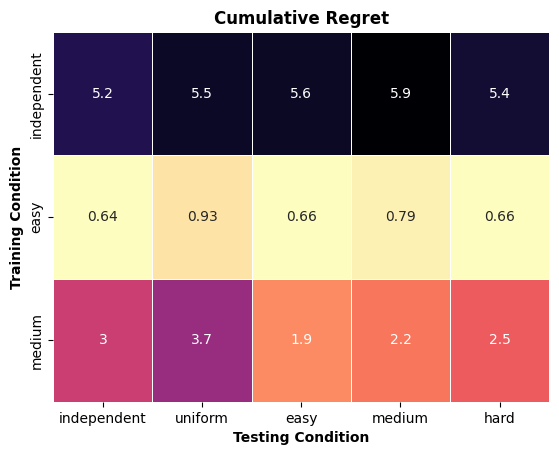

In [5]:
best_result = results_df.loc[results_df.groupby(['train_difficulty', 'test_difficulty'])['val_score_2'].idxmin()]
display(best_result)

# Group by train and test difficulty, and get N files with min val score
N = 3
best_results = results_df.groupby(['train_difficulty', 'test_difficulty'], group_keys=False).apply(lambda x: x.nsmallest(N, 'val_score_2'))
tmp = best_results.groupby(['train_difficulty', 'test_difficulty'])[['test_score_2']].mean()
tmp = tmp.pivot_table(index='train_difficulty', columns='test_difficulty', values='test_score_2')
tmp = tmp.reindex(index=['independent', 'easy', 'medium'], columns=['independent', 'uniform','easy', 'medium', 'hard'])
tmp = tmp.round(2)
sns.heatmap(tmp, annot = True, cmap = "magma_r", linewidths=.5, cbar = False)
plt.title('Cumulative Regret', fontweight="bold")
plt.xlabel("Testing Condition", fontweight="bold")
plt.ylabel("Training Condition", fontweight="bold")
plt.show()


## **UCB**

In [6]:
ucb = pd.read_csv('./Monografia/Exp1-2/UCB_exp_1and2.csv')
ucb.head(2)

,easy,medium,hard,uniform,independent
0,0.40184,0.251975,0.09861,0.249278,0.166392
1,0.80000,0.500000,0.20000,0.498700,0.334421


## **Plot Steps vs Cumulative Regret**

In [13]:
def plot_steps_cumulative_regret(y_bandit_values, std_bandit_values, ucb_values, train_difficulty, test_difficulty):

    confidence_interval = 1.96 * std_bandit_values / np.sqrt(y_bandit_values.shape[0])  # 1.96 is for 95% CI    
    
    plt.plot(y_bandit_values, label = f'LSTM A2C "{train_difficulty.upper()}"', color = 'green' )
    plt.plot(ucb_values, label = 'UCB', color = 'grey', linestyle = 'dotted')

    plt.fill_between(
        range(len(y_bandit_values)),  # X-axis
        y_bandit_values - confidence_interval,  # Lower bound
        y_bandit_values + confidence_interval,  # Upper bound
        color='green', 
        alpha=0.2,  # Transparency
        label='95% Confidence Interval'
    )


    plt.title(f"Test Difficulty: {test_difficulty}", fontweight="bold")
    plt.xlabel("Steps", fontweight="bold")  # Label for the x-axis
    plt.ylabel("Cumulative Regret", fontweight="bold") 
    plt.legend()  # Adds the legend for the labels
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()
    plt.clf()

independent - independent
['TrainDiff_independent__LR_0_0001__GAMMA_0_7__EntropyDecay_True__TestDiff_independent.pkl'
 'TrainDiff_independent__LR_0_0001__GAMMA_0_7__EntropyDecay_False__TestDiff_independent.pkl'
 'TrainDiff_independent__LR_0_0001__GAMMA_0_9__EntropyDecay_True__TestDiff_independent.pkl']


,file,test_score_2
67,TrainDiff_independent__LR_0_0001__GAMMA_0_7__E...,5.662954
62,TrainDiff_independent__LR_0_0001__GAMMA_0_7__E...,5.010071
87,TrainDiff_independent__LR_0_0001__GAMMA_0_9__E...,4.933991


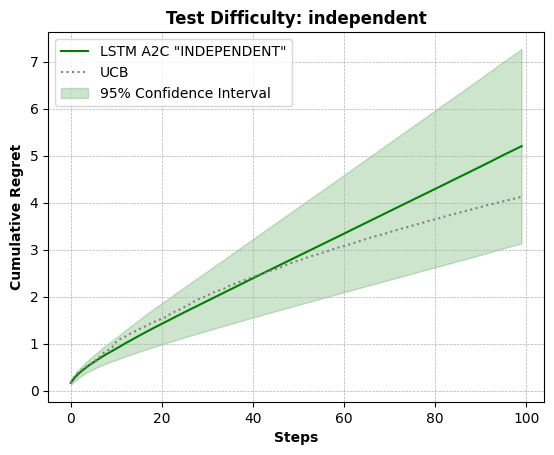

medium - easy
['TrainDiff_medium__LR_0_0001__GAMMA_0_9__EntropyDecay_True__TestDiff_easy.pkl'
 'TrainDiff_medium__LR_0_0001__GAMMA_0_9__EntropyDecay_False__TestDiff_easy.pkl'
 'TrainDiff_medium__LR_0_0001__GAMMA_0_7__EntropyDecay_False__TestDiff_easy.pkl']


,file,test_score_2
145,TrainDiff_medium__LR_0_0001__GAMMA_0_9__Entrop...,1.510000
140,TrainDiff_medium__LR_0_0001__GAMMA_0_9__Entrop...,2.233333
120,TrainDiff_medium__LR_0_0001__GAMMA_0_7__Entrop...,2.056667


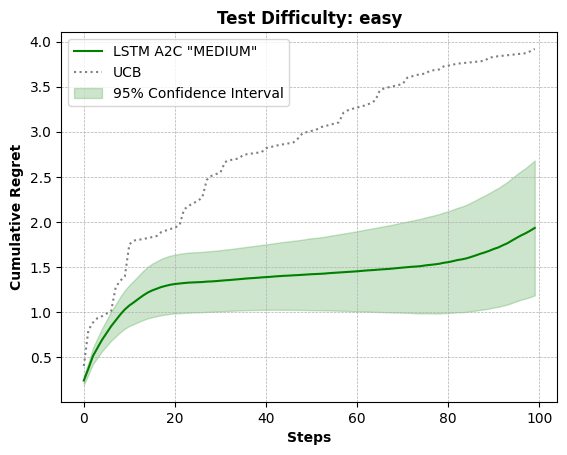

medium - hard
['TrainDiff_medium__LR_0_0001__GAMMA_0_9__EntropyDecay_True__TestDiff_hard.pkl'
 'TrainDiff_medium__LR_0_0001__GAMMA_0_7__EntropyDecay_False__TestDiff_hard.pkl'
 'TrainDiff_medium__LR_0_0001__GAMMA_0_9__EntropyDecay_False__TestDiff_hard.pkl']


,file,test_score_2
146,TrainDiff_medium__LR_0_0001__GAMMA_0_9__Entrop...,2.313333
121,TrainDiff_medium__LR_0_0001__GAMMA_0_7__Entrop...,3.113333
141,TrainDiff_medium__LR_0_0001__GAMMA_0_9__Entrop...,1.990000


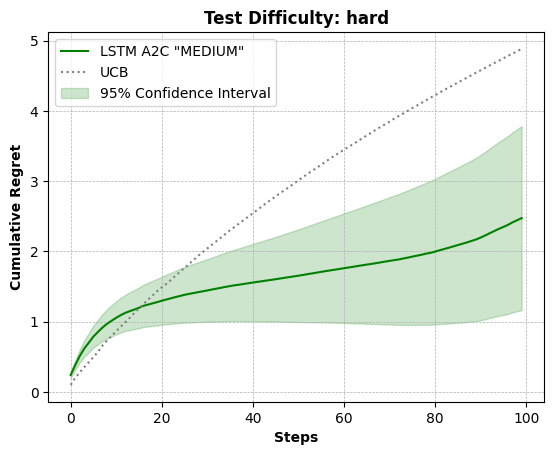

<Figure size 640x480 with 0 Axes>

In [14]:
difficulties = [('independent', 'independent'), ('medium', 'easy'), ('medium', 'hard')] # (train, test)


for train_difficulty, test_difficulty  in difficulties:
    print(f"{train_difficulty} - {test_difficulty}")

    cumulative_regret_all_values  = None
    # Get dir of best iterations
    best_results_train_test_combination = best_results[(best_results.train_difficulty == train_difficulty) & (best_results.test_difficulty == test_difficulty)]
    print(best_results_train_test_combination.file.values)
    display(best_results_train_test_combination[['file', 'test_score_2']])


    # Iterate through best models episodes results
    for file in best_results_train_test_combination.file.values:

        model_results_df = pd.read_pickle(folder_path + '/' + file)
        model_results_df = metricas_2(model_results_df)

        cumulative_regret_values = model_results_df[150:]['Cumulative Regret List'].values
        cumulative_regret_values = np.vstack(cumulative_regret_values)

        if cumulative_regret_all_values is None:
            cumulative_regret_all_values = cumulative_regret_values
        else:
            cumulative_regret_all_values = np.vstack((cumulative_regret_all_values, cumulative_regret_values))

        
    mean_cumulative_regret = np.mean(cumulative_regret_all_values, axis=0)    
    std_cumulative_regret = np.std(cumulative_regret_all_values, axis=0)    
    ucb_values = ucb[test_difficulty]
    plot_steps_cumulative_regret(mean_cumulative_regret, std_cumulative_regret, ucb_values, train_difficulty, test_difficulty)            


